# 实例：实现单层神经网络

softmax函数——tf. nn. softmax()

Y=XW+B——tf.nn.softmax(tf.matmul(X_train,W)+b)

独热编码——tf. one_hot(indices, depth)

tf.one_hot(tf.constant(y_test, dtype=tf.int32), 3)

交叉熵损失函数——tf.keras.losses.categorical_crossentropy(y_true, y_pred)

(y_true, y_pred)——（表示为独热编码的标签值，softmax函数的输出）

tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y_train,y_pred=PRED_train))

### 导入库

In [1]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.5.0-rc3


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0],True)

In [23]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

如果有多个gpu，使用for循环

for gpu in gpus:

   tf.config.experimental.set_memory_growth(gpu,True)

### 加载数据

In [4]:
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)

TEST_URL="http://download.tensorflow.org/data/iris_test.csv"
test_path=tf.keras.utils.get_file(TEST_URL.split('/')[-1],TEST_URL)

In [5]:
df_iris_train=pd.read_csv(train_path,header=0)
df_iris_test=pd.read_csv(test_path,header=0)

In [6]:
iris_train=np.array(df_iris_train)
iris_test=np.array(df_iris_test)

In [7]:
iris_train.shape,iris_test.shape

((120, 5), (30, 5))

### 数据预处理

In [8]:
x_train=iris_train[:,0:4]
y_train=iris_train[:,4]

x_test=iris_test[:,0:4]
y_test=iris_test[:,4]

In [9]:
x_train.shape,y_train.shape

((120, 4), (120,))

In [10]:
x_test.shape,y_test.shape

((30, 4), (30,))

In [11]:
x_train=x_train-np.mean(x_train,axis=0)#数据中心化
x_test=x_test-np.mean(x_test,axis=0)#数据中心化

In [12]:
x_train.dtype,y_train.dtype

(dtype('float64'), dtype('float64'))

In [13]:
X_train=tf.cast(x_train,tf.float32)
Y_train=tf.one_hot(tf.constant(y_train,dtype=tf.int32),3)
#训练结果转化为独热编码

X_test=tf.cast(x_test,tf.float32)
Y_test=tf.one_hot(tf.constant(y_test,dtype=tf.int32),3)
#测试结果转为独热编码

In [14]:
X_train.shape,Y_train.shape

(TensorShape([120, 4]), TensorShape([120, 3]))

In [15]:
X_test.shape,Y_test.shape

(TensorShape([30, 4]), TensorShape([30, 3]))

### 设置超参数和显示间隔

In [16]:
learn_rate=0.5
iter=50

display_step=10

### 设置模型参数初始值

In [17]:
np.random.seed(612)#随机种子612
W=tf.Variable(np.random.randn(4,3),dtype=tf.float32)#W为（4，3）的正态分布随机值
B=tf.Variable(np.zeros([3]),dtype=tf.float32)#B初始值设为0

### 训练模型

In [20]:
acc_train=[]
acc_test=[]
cce_train=[]
cce_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED_train=tf.nn.softmax(tf.matmul(X_train,W)+B)#训练集数据输出
        Loss_train=tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y_train,y_pred=PRED_train))
        #训练集交叉熵损失
        
    PRED_test=tf.nn.softmax(tf.matmul(X_test,W)+B)
    Loss_test=tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y_test,y_pred=PRED_test))
    
    #训练集和测试集的准确率
    accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_train.numpy(),axis=1),y_train),tf.float32))
    accuracy_test=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_test.numpy(),axis=1),y_test),tf.float32))
    
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    cce_train.append(Loss_train)
    cce_test.append(Loss_test)
    
    grads=tape.gradient(Loss_train,[W,B])#使用训练集分别获得损失函数对W和B的偏导数
    W.assign_sub(learn_rate*grads[0])#dL_dw (4,3)更新W的值
    B.assign_sub(learn_rate*grads[1])#dL_db (3,) 更新B的值
    
    if i % display_step==0:
        print("i:%i,TrainAcc:%f,TrainLoss:%f,TestAcc:%f,TestLoss:%f" % (i,accuracy_train,Loss_train,accuracy_test,Loss_test))

i:0,TrainAcc:0.333333,TrainLoss:2.066978,TestAcc:0.266667,TestLoss:1.880856
i:10,TrainAcc:0.875000,TrainLoss:0.339410,TestAcc:0.866667,TestLoss:0.461705
i:20,TrainAcc:0.875000,TrainLoss:0.279647,TestAcc:0.866667,TestLoss:0.368414
i:30,TrainAcc:0.916667,TrainLoss:0.245924,TestAcc:0.933333,TestLoss:0.314814
i:40,TrainAcc:0.933333,TrainLoss:0.222922,TestAcc:0.933333,TestLoss:0.278643
i:50,TrainAcc:0.933333,TrainLoss:0.205636,TestAcc:0.966667,TestLoss:0.251937


### 结果可视化

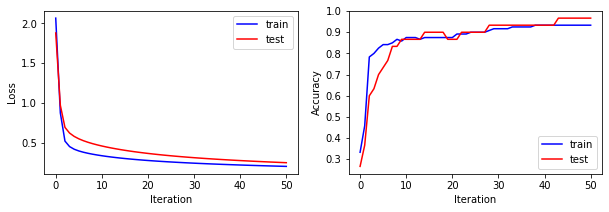

In [22]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(cce_train,color="blue",label="train")
plt.plot(cce_test,color="red",label="test")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.subplot(122)
plt.plot(acc_train,color="blue",label="train")
plt.plot(acc_test,color="red",label="test")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()

plt.show()